# DRUGCOMB

## 1) Dowload Summary data

https://drugcomb.org/download/


no parece que tenga información de combinación de fármacos


In [2]:
import pandas as pd

#df = pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\summary_v_1_5.csv")


In [11]:
df.head()  # Displays the first 5 rows

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name
0,518700,KIN001-055,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,0.881484,0.0,...,-1.3835,-2.767,0.0,0.0,0.0,0.0,0,0,\N,\N
1,521155,56990-57-9,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,0.135146,0.0,...,1.6760,0.000,0.0,0.0,0.0,0.0,0,0,\N,\N
2,521217,AR-42,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,2.383739,0.0,...,1.3250,0.000,0.0,0.0,0.0,0.0,1,0,Histone deacetylase,\N
3,527158,QL-X-138,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,10.240000,0.0,...,2.3020,0.000,0.0,0.0,0.0,0.0,0,0,\N,\N
4,527253,Belinostat,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,19.134169,0.0,...,3.1075,0.000,0.0,0.0,0.0,0.0,4,0,Histone deacetylase; Histone deacetylase 1; Hi...,\N


In [14]:
df.columns

Index(['block_id', 'drug_row', 'drug_col', 'cell_line_name', 'study_name',
       'tissue_name', 'conc_row_unit', 'conc_col_unit', 'ic50_row', 'ic50_col',
       'ri_row', 'ri_col', 'css_row', 'css_col', 'css_ri', 'S_sum', 'S_mean',
       'S_max', 'synergy_zip', 'synergy_loewe', 'synergy_hsa', 'synergy_bliss',
       'drug_row_clinical_phase', 'drug_col_clinical_phase',
       'drug_row_target_name', 'drug_col_target_name'],
      dtype='object')

## 2) API

Esquema de la base de datos:

Vamo a primero sacar toda la informacion en csv por tabla por tener la información mas accesible. Vamos a filtrar por linea celular de neuroblastoma y por que el tissue sea el brain. 

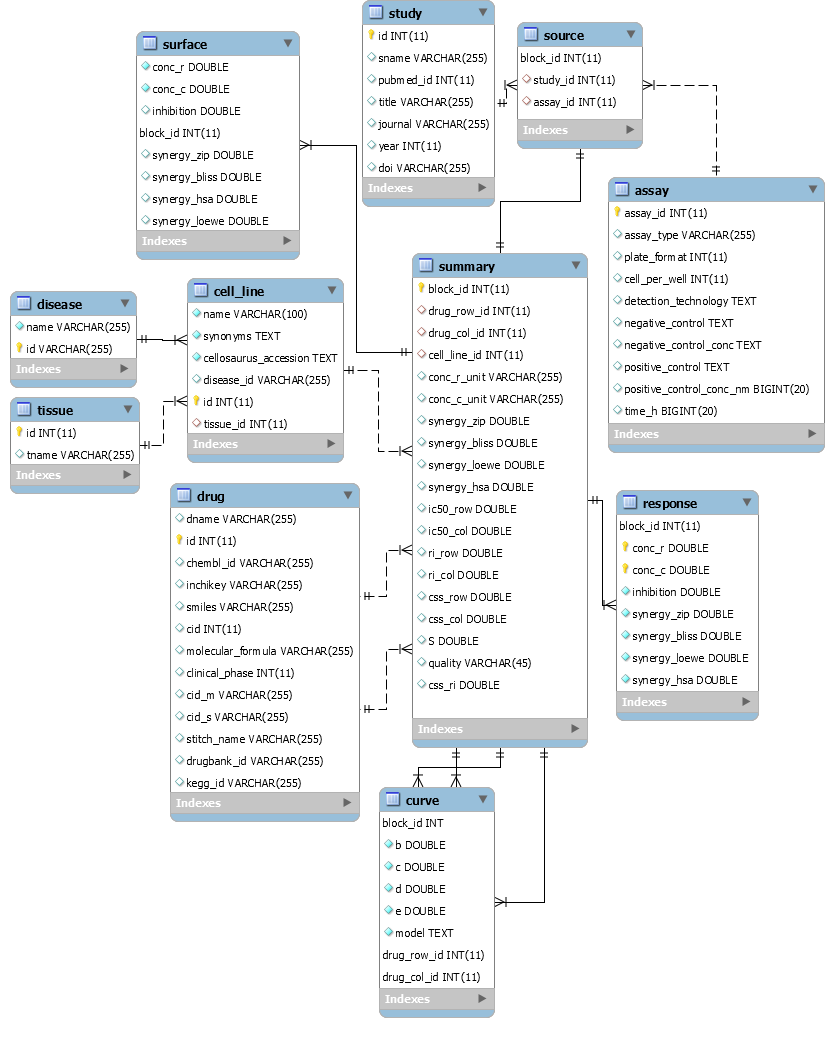

To determine the number of entries in the DrugComb database, you can refer to the statistics provided on their official website:

* Number of Drugs: 8,397
* Number of Cell Lines: 2,320
* Number of Tissues: 33
* Number of Drug Combinations: 739,964

In [ ]:
import requests
import pandas as pd
import os
import time

# Base URL for DrugComb API
BASE_URL = "https://api.drugcomb.org"

# Expected number of entries (from DrugComb website)
EXPECTED_ENTRIES = {
    "drugs": 8397,
    "cell_lines": 2320,
    "studies": 37, 
    "summary": 739964,
    "response": 739964
}

# Directory to store CSV files
DATA_DIR = "drugcomb_v2"
os.makedirs(DATA_DIR, exist_ok=True)  # Ensure the directory exists

# Function to fetch paginated data
def fetch_all_paginated_data(endpoint, batch_size=1000):
    """
    Fetches all data from the API with proper pagination.
    Ensures all records are retrieved by checking response length.
    """
    all_data = []
    offset = 0
    expected_total = EXPECTED_ENTRIES.get(endpoint, None)

    while True:
        url = f"{BASE_URL}/{endpoint}"
        params = {"from": offset, "to": offset + batch_size}
        response = requests.get(url, params=params, verify=False)  # Use verify=True if SSL works

        if response.status_code == 200:
            batch = response.json()
            if not batch:  # Stop when no more data is returned
                break
            all_data.extend(batch)
            offset += batch_size
            time.sleep(0.5)  # Prevent API overload
            print(f"📊 Extracted {len(all_data)} entries from {endpoint}")

            # Check if we have reached the expected number of entries
            if expected_total and len(all_data) >= expected_total:
                print(f"✅ Expected number of {expected_total} entries reached for {endpoint}.")
                break

        else:
            print(f"❌ Failed to fetch {endpoint} - Status Code: {response.status_code}")
            break
    
    print(f"✅ Final count for {endpoint}: {len(all_data)} entries")
    return all_data

# Function to save data as CSV
def save_as_csv(data, filename):
    if data:
        df = pd.DataFrame(data)
        file_path = os.path.join(DATA_DIR, f"{filename}.csv")
        df.to_csv(file_path, index=False)
        print(f"✅ Data saved to {file_path}")
    else:
        print(f"❌ No data available for {filename}")

# Manual calls for fetching and saving each dataset
def fetch_summary():
    summary = fetch_all_paginated_data("summary", batch_size=5000)
    save_as_csv(summary, "summary")

def fetch_responses():
    response_data = fetch_all_paginated_data("response", batch_size=500)
    save_as_csv(response_data, "responses")

def fetch_drugs():
    drugs = fetch_all_paginated_data("drugs", batch_size=500)
    save_as_csv(drugs, "drugs")

def fetch_cell_lines():
    cell_lines = fetch_all_paginated_data("cell_lines", batch_size=500)
    save_as_csv(cell_lines, "cell_lines")

def fetch_studies():
    studies = fetch_all_paginated_data("studies", batch_size=500)
    save_as_csv(studies, "studies")


In [ ]:
# fetch_summary()
# fetch_responses()
# fetch_drugs()
# fetch_cell_lines()
# fetch_studies()


In [10]:
fetch_studies() ##no esta bien 


C:\Users\Usuario\anaconda3\envs\myenv\lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.drugcomb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


📊 Extracted 37 entries from studies
✅ Expected number of 37 entries reached for studies.
✅ Final count for studies: 37 entries
✅ Data saved to drugcomb_v2\studies.csv


In [11]:
fetch_cell_lines() ##esta bien


C:\Users\Usuario\anaconda3\envs\myenv\lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.drugcomb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


📊 Extracted 2320 entries from cell_lines
✅ Expected number of 2320 entries reached for cell_lines.
✅ Final count for cell_lines: 2320 entries
✅ Data saved to drugcomb_v2\cell_lines.csv


In [1]:
#fetch_summary()


In [17]:
fetch_drugs()

C:\Users\Usuario\anaconda3\envs\myenv\lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.drugcomb.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


📊 Extracted 8397 entries from drugs
✅ Expected number of 8397 entries reached for drugs.
✅ Final count for drugs: 8397 entries
✅ Data saved to drugcomb_v2\drugs.csv


In [2]:
#fetch_responses() ##me da error de la API pues bueno ya lo itnentare

we now have all the data of the api into the local computer and we can access it in an easier way

## 3) Webcrapping 
* Con las cell lines de neuroblastoma --> es todo de cancer
* Probar en general con las lineas celulares de brain
* En disease que se saca por cell line poner neuroblastoma a ver que se consigue aunque no hay para el cui

**1)**
Ver si con el diease id tenemos alguno que machee con nuestras enfermedades. No es el mismo codigo, no tienen la misma longitud asi que no podemos matcher por aqui. Ademas por alguna razon no hay endpoint del disease.  

Me he enterado que el disease id es NCI Thesaurus Code no es el cui NCI Thesaurus Code  eg C60781 que podemos ver que su cui es C0004114 https://ncit.nci.nih.gov/ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&ns=ncit&code=C60781 

In [66]:
# Cargar el CSV (asegúrate de cambiar 'archivo.csv' por la ruta correcta)
df_cell_lines = pd.read_csv('drugcomb_v2/cell_lines.csv')

In [28]:
df_cell_lines.head()

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data
0,786-0,786-0; 786O; 786-0; 786.O; 786-O RCC; RCC 786-...,CVCL_1051,C9385,1,5.0,ACH-000649,SIDM00125,905947.0,786O_KIDNEY,BROAD_DepMap
1,A2058,A2058; A 2058; A-2058,CVCL_1059,C3802,2,10.0,ACH-000788,SIDM00797,906792.0,A2058_SKIN,BROAD_DepMap
2,A2780,A2780; A-2780; 2780; A2780S,CVCL_0134,C7979,3,8.0,ACH-000657,SIDM00210,906804.0,A2780_OVARY,BROAD_DepMap
3,A375,A375; A 375; A375; A375-MEL; A375-mel; A375mel,CVCL_0132,C3802,4,10.0,ACH-000219,SIDM00795,906793.0,A375_SKIN,BROAD_DepMap
4,A427,A427; A427,CVCL_1055,C3512,5,7.0,ACH-000757,SIDM00810,910851.0,A427_LUNG,BROAD_DepMap


In [24]:
df_diseases = pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\neuro_diseases_names.tsv",delimiter="\t")

In [25]:
df_diseases

,cui,disease_name
0,C0001206,Acromegaly
1,C0001973,"Alcoholic Intoxication, Chronic"
2,C0002395,Alzheimer's Disease
3,C0002622,Amnesia
4,C0002736,Amyotrophic Lateral Sclerosis
...,...,...
171,C1839259,"Bulbo-Spinal Atrophy, X-Linked"
172,C1868675,"PARKINSON DISEASE 2, AUTOSOMAL RECESSIVE JUVENILE"
173,C1955869,Malformations of Cortical Development
174,C2931689,Dystrophia myotonica 2


**theaseurus**

El código que encontramos en disease id es el de NCI Thesaurus Code y en la pagina web de theaseurus podemos encontrar el cui correspondiente. Vamos a hacer web scrpaping para ver cuales pueden corresponderse con nuestras enfermedades

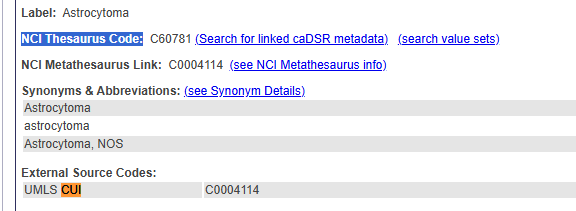

https://ncit.nci.nih.gov/ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&ns=ncit&code=C60781

no hay ninguna cell line que se corresponda con las que dijo andrea

**2)** Ver cell lines  relacionadas con neuroblastoma 

In [29]:
# Merge df with df_diseases based on the matching values in disease_id and cui
df_matched = df_cell_lines[df_cell_lines["name"].isin(["SHSY5Y","ND30625"])]
df_matched

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data


**3)** Ver todas las cell lines relacionadas con el brain + cancer

In [30]:
# Count unique tissue_id values in the df_extracted (cell lines dataset)
unique_tissue_count = df_cell_lines["tissue_id"].nunique()

# Display the result
unique_tissue_count

34

In [32]:
# Create a dataframe with the first occurrence of each unique tissue_id
df_unique_tissue = df_cell_lines.drop_duplicates(subset=["tissue_id"], keep="first")

In [33]:
df_unique_tissue

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data
0,786-0,786-0; 786O; 786-0; 786.O; 786-O RCC; RCC 786-...,CVCL_1051,C9385,1,5.0,ACH-000649,SIDM00125,905947.0,786O_KIDNEY,BROAD_DepMap
1,A2058,A2058; A 2058; A-2058,CVCL_1059,C3802,2,10.0,ACH-000788,SIDM00797,906792.0,A2058_SKIN,BROAD_DepMap
2,A2780,A2780; A-2780; 2780; A2780S,CVCL_0134,C7979,3,8.0,ACH-000657,SIDM00210,906804.0,A2780_OVARY,BROAD_DepMap
4,A427,A427; A427,CVCL_1055,C3512,5,7.0,ACH-000757,SIDM00810,910851.0,A427_LUNG,BROAD_DepMap
8,BT-549,BT-549; BT549; BT 549; BT.549,CVCL_1092,C4194,9,2.0,ACH-000288,SIDM00122,905951.0,BT549_BREAST,BROAD_DepMap
11,CCRF-CEM,CCRF-CEM; CCRF/CEM; CCRFCEM; CCRF.CEM; CCRF CE...,CVCL_0207,C7953,12,4.0,ACH-001738,SIDM00121,905952.0,CCRFCEM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CellModelPassport
12,COLO 205,COLO 205; Colo 205; CoLo 205; COLO-205; Colo-2...,CVCL_0218,C4349,13,6.0,ACH-001039,SIDM00826,905961.0,COLO205_LARGE_INTESTINE,CellModelPassport
15,DU-145,DU-145; DU-145; Du-145; DU 145; DU_145,CVCL_0105,C4863,16,9.0,ACH-000979,SIDM00120,905935.0,DU145_PROSTATE,CellModelPassport
65,SF-268,SF-268; SF-268; SF 268,CVCL_1689,C60781,66,1.0,ACH-000655,SIDM00085,905986.0,SF268_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap
93,A-673,A-673; A673; RMS 1598; RMS1598,CVCL_0080,C4817,94,11.0,ACH-000052,SIDM00848,684052.0,A673_BONE,BROAD_DepMap


por contesto saco que el cell line 1 es de brain y pueden ser las enfermedades relaccionadas con nuestros datos. Hay 119 cell lines relacionadas con el cancer en brain

In [50]:
# Merge df with df_diseases based on the matching values in disease_id and cui
df_brain = df_cell_lines[df_cell_lines["tissue_id"] == 1]
df_brain 

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data
65,SF-268,SF-268; SF-268; SF 268,CVCL_1689,C60781,66,1.0,ACH-000655,SIDM00085,905986.0,SF268_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap
66,SF-295,SF-295; SF-295; SF 295,CVCL_1690,C3058,67,1.0,ACH-000376,SIDM00084,905985.0,SF295_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap
67,SF-539,SF-539; SF-539; SF-539 BT; SF 539,CVCL_1691,C3796,68,1.0,ACH-000273,SIDM00083,905984.0,SF539_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap
75,SNB-19,SNB-19; SNB.19; SNB19,CVCL_0535,C60781,76,1.0,ACH-001198,SIDM00109,NaN,SNB19_CENTRAL_NERVOUS_SYSTEM,NaN
76,SNB-75,SNB-75; SNB.75; SNB75,CVCL_1706,C3058,77,1.0,ACH-000504,SIDM00095,905982.0,SNB75_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap
...,...,...,...,...,...,...,...,...,...,...,...
2269,U3005MG,U3005MG; U3005-MG; U3005,CVCL_IR58,C3058,2270,1.0,NaN,NaN,NaN,NaN,NaN
2270,U3013MG,U3013MG; U3013-MG; U3013,CVCL_IR61,C3058,2271,1.0,NaN,NaN,NaN,NaN,NaN
2271,U3024MG,U3024MG; U3024-MG; U3024,CVCL_IR67,C3058,2272,1.0,NaN,NaN,NaN,NaN,NaN
2272,U3034MG,U3034MG; U3034-MG; U3034,CVCL_IR73,C3058,2273,1.0,NaN,NaN,NaN,NaN,NaN


do we scrapping to have cui 

In [47]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# Cargar el archivo CSV
file_path = "cell_lines.csv"  # Asegúrate de que el archivo está en la misma carpeta o proporciona la ruta completa

# Definir la función para extraer el CUI de la página web
def get_umls_cui(ncit_code):
    url = f"https://ncit.nci.nih.gov/ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&ns=ncit&code={ncit_code}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return None  # Retorna None si la página no carga correctamente

    # Parsear la página con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Buscar la sección de "External Source Codes"
    external_codes_section = soup.find(text="External Source Codes:")
    if not external_codes_section:
        return None  # Si no se encuentra la sección, retorna None

    # Buscar el CUI dentro de esta sección
    cui_element = external_codes_section.find_next("td")
    if cui_element:
        return cui_element.text.strip()
    
    return None

In [48]:
# Aplicar web scraping a cada fila del dataframe
df_brain["UMLS_CUI"] = df_brain["disease_id"].apply(lambda x: get_umls_cui(x) if pd.notna(x) else None)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14096\2336972201.py:24: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  external_codes_section = soup.find(text="External Source Codes:")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_14096\759593775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brain["UMLS_CUI"] = df_brain["disease_id"].apply(lambda x: get_umls_cui(x) if pd.notna(x) else None)


In [52]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import random


# Function to extract UMLS CUI from NCI Thesaurus webpage
def get_umls_cui(ncit_code):
    url = f"https://ncit.nci.nih.gov/ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&ns=ncit&code={ncit_code}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raise an error if request fails
    except requests.RequestException as e:
        print(f"Error fetching {ncit_code}: {e}")
        return None  # Return None if request fails

    soup = BeautifulSoup(response.text, 'html.parser')

    # Locate the table containing "External Source Codes"
    table = soup.find("table", {"summary": "External Source Codes"})
    if table:
        # Find the row that contains "UMLS CUI"
        for row in table.find_all("tr"):
            cells = row.find_all("td")
            if len(cells) == 2 and "UMLS CUI" in cells[0].text:
                return cells[1].text.strip()  # Extract the CUI

    return None  # Return None if CUI is not found

In [58]:
import requests
from bs4 import BeautifulSoup

def get_umls_cui(ncit_code):
    url = f"https://ncit.nci.nih.gov/ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&ns=ncit&code={ncit_code}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()  # Raise an error for failed requests
    except requests.RequestException as e:
        print(f"Error fetching {ncit_code}: {e}")
        return None  # Return None if request fails

    soup = BeautifulSoup(response.text, 'html.parser')

    # Look for any tag containing "UMLS CUI"
    cui_label = soup.find(lambda tag: tag.name in ["td", "th", "span"] and "UMLS CUI" in tag.text)
    
    if cui_label:
        # Find the next sibling or next cell containing the actual CUI value
        cui_value = cui_label.find_next("td")
        if cui_value:
            return cui_value.text.strip()

    print(f"❌ CUI not found for: {ncit_code}")
    return None  # If CUI is not found




In [59]:
# Test with one code
#print(get_umls_cui("C60781"))  # Expected output: C0004114

C0004114


In [62]:
df_brain["UMLS_CUI"] = df_brain["disease_id"].apply(lambda x: get_umls_cui(x) if pd.notna(x) else None)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14096\3578235786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brain["UMLS_CUI"] = df_brain["disease_id"].apply(lambda x: get_umls_cui(x) if pd.notna(x) else None)


In [63]:
df_brain

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data,UMLS_CUI
65,SF-268,SF-268; SF-268; SF 268,CVCL_1689,C60781,66,1.0,ACH-000655,SIDM00085,905986.0,SF268_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap,C0004114
66,SF-295,SF-295; SF-295; SF 295,CVCL_1690,C3058,67,1.0,ACH-000376,SIDM00084,905985.0,SF295_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap,C0017636
67,SF-539,SF-539; SF-539; SF-539 BT; SF 539,CVCL_1691,C3796,68,1.0,ACH-000273,SIDM00083,905984.0,SF539_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap,C0206726
75,SNB-19,SNB-19; SNB.19; SNB19,CVCL_0535,C60781,76,1.0,ACH-001198,SIDM00109,NaN,SNB19_CENTRAL_NERVOUS_SYSTEM,NaN,C0004114
76,SNB-75,SNB-75; SNB.75; SNB75,CVCL_1706,C3058,77,1.0,ACH-000504,SIDM00095,905982.0,SNB75_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap,C0017636
...,...,...,...,...,...,...,...,...,...,...,...,...
2269,U3005MG,U3005MG; U3005-MG; U3005,CVCL_IR58,C3058,2270,1.0,NaN,NaN,NaN,NaN,NaN,C0017636
2270,U3013MG,U3013MG; U3013-MG; U3013,CVCL_IR61,C3058,2271,1.0,NaN,NaN,NaN,NaN,NaN,C0017636
2271,U3024MG,U3024MG; U3024-MG; U3024,CVCL_IR67,C3058,2272,1.0,NaN,NaN,NaN,NaN,NaN,C0017636
2272,U3034MG,U3034MG; U3034-MG; U3034,CVCL_IR73,C3058,2273,1.0,NaN,NaN,NaN,NaN,NaN,C0017636


In [64]:
df_matched = df_brain[df_brain["UMLS_CUI"].isin(df_diseases["cui"])]


In [65]:
df_matched

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data,UMLS_CUI


no matchea ninguno, vamos a probar con todo el dataset the tissues

In [67]:
df_cell_lines["UMLS_CUI"] = df_cell_lines["disease_id"].apply(lambda x: get_umls_cui(x) if pd.notna(x) else None)

❌ CUI not found for: C4303
❌ CUI not found for: C129857
❌ CUI not found for: C3457
❌ CUI not found for: C102872
❌ CUI not found for: C129863
❌ CUI not found for: C7152
❌ CUI not found for: C7152
❌ CUI not found for: C7152
❌ CUI not found for: C3457
❌ CUI not found for: C3457
❌ CUI not found for: C3457
❌ CUI not found for: C3457
❌ CUI not found for: C7152
❌ CUI not found for: C3457
❌ CUI not found for: C129927
❌ CUI not found for: C129927
❌ CUI not found for: C35425
❌ CUI not found for: C129857


In [70]:
from concurrent.futures import ThreadPoolExecutor

def process_row(x):
    return get_umls_cui(x) if pd.notna(x) else None

with ThreadPoolExecutor() as executor:
    results = list(executor.map(process_row, df_cell_lines["disease_id"]))

df_cell_lines.loc[:, "UMLS_CUI"] = results  # Ensure index alignmen

Error fetching C9385: HTTPSConnectionPool(host='ncit.nci.nih.gov', port=443): Read timed out. (read timeout=10)
❌ CUI not found for: C4303
❌ CUI not found for: C129857
❌ CUI not found for: C3457
Error fetching C4910: HTTPSConnectionPool(host='ncit.nci.nih.gov', port=443): Max retries exceeded with url: /ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&ns=ncit&code=C4910 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000223B88D1BE0>, 'Connection to ncit.nci.nih.gov timed out. (connect timeout=10)'))
❌ CUI not found for: C102872
❌ CUI not found for: C129863
Error fetching C3493: HTTPSConnectionPool(host='ncit.nci.nih.gov', port=443): Max retries exceeded with url: /ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&ns=ncit&code=C3493 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000223BB581D00>, 'Connection to ncit.nci.nih.gov timed out. (connect timeout=10)'))
❌ CUI not found for: C7152
❌ CUI not found for: C

In [71]:
df_cell_lines

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data,UMLS_CUI
0,786-0,786-0; 786O; 786-0; 786.O; 786-O RCC; RCC 786-...,CVCL_1051,C9385,1,5.0,ACH-000649,SIDM00125,905947.0,786O_KIDNEY,BROAD_DepMap,None
1,A2058,A2058; A 2058; A-2058,CVCL_1059,C3802,2,10.0,ACH-000788,SIDM00797,906792.0,A2058_SKIN,BROAD_DepMap,C0206735
2,A2780,A2780; A-2780; 2780; A2780S,CVCL_0134,C7979,3,8.0,ACH-000657,SIDM00210,906804.0,A2780_OVARY,BROAD_DepMap,C0346163
3,A375,A375; A 375; A375; A375-MEL; A375-mel; A375mel,CVCL_0132,C3802,4,10.0,ACH-000219,SIDM00795,906793.0,A375_SKIN,BROAD_DepMap,C0206735
4,A427,A427; A427,CVCL_1055,C3512,5,7.0,ACH-000757,SIDM00810,910851.0,A427_LUNG,BROAD_DepMap,C0152013
...,...,...,...,...,...,...,...,...,...,...,...,...
2315,Dd2 K13 wild-type,Dd2 K13 wild-type,NaN,C34797,2316,3.0,NaN,NaN,NaN,NaN,NaN,None
2316,163-KH2-024,163-KH2-024,NaN,C34797,2317,3.0,NaN,NaN,NaN,NaN,NaN,None
2317,163-KH2-D33,163-KH2-D33,NaN,C34797,2318,3.0,NaN,NaN,NaN,NaN,NaN,None
2318,967 539T,967 539T,NaN,C34797,2319,3.0,NaN,NaN,NaN,NaN,NaN,None


In [72]:
df_matched = df_cell_lines[df_cell_lines["UMLS_CUI"].isin(df_diseases["cui"])]

In [73]:
df_matched

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data,UMLS_CUI
269,CMK,CMK,CVCL_0216,C2993,270,4.0,ACH-000641,SIDM00959,910566.0,CMK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BROAD_DepMap,C0013080
270,CMK-11-5,CMK-11-5; CMK 11-5; CMK11-5; CMK115,CVCL_0217,C2993,271,4.0,ACH-001036,SIDM01235,NaN,CMK115_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BROAD_DepMap,C0013080
271,CMK-86,CMK-86; CMK86,CVCL_2804,C2993,272,4.0,ACH-001037,SIDM01940,NaN,CMK86_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,C0013080
736,KATO III,KATO III; Kato III; Kato-III; KATO-III; KATOII...,CVCL_0371,C2993,737,16.0,ACH-000793,SIDM00687,907276.0,KATOIII_STOMACH,BROAD_DepMap,C0013080


han matcheado los id 270 271, 272, 737

In [74]:
df_cell_lines.to_csv("cell_lines_with_cui.csv", index=False)  # Saves without the index

## ANALISIS DESDE LOS CSV

**4)** Sacamos combinaciones de farmacos relacionados con el syndrome de down

In [20]:
import pandas as pd
df_drugs = pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\drugs.csv", low_memory=False)
df_summary = pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\summary.csv", low_memory=False)
df_responses = pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\responses.csv", low_memory=False)
df_studies = pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\studies.csv", low_memory=False)
df_cell_lines = pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\cell_lines_with_cui.csv", low_memory=False)

In [35]:
df_studies.head(5)

,id,sname,pubmed_id,title,journal,year,doi
0,1,ONEIL,26983881.0,An Unbiased Oncology Compound Screen to Identi...,Mol Cancer Ther,2016.0,10.1158/1535-7163.MCT-15-0843\r
1,2,CLOUD,28530711.0,A combinatorial screen of the CLOUD uncovers a...,Nat Chem Biol,2017.0,10.1038/nchembio.7916\r
2,3,ALMANAC,28446463.0,The National Cancer Institute ALMANAC: A Compr...,Cancer Re,2017.0,doi: 10.1158/0008-5472\r
3,4,FORCINA,28601558.0,Systematic Quantification of Population Cell D...,Cell Syst,2017.0,10.1016/j.cels.2017.05.002\r
4,5,NCATS_ATL,0.0,NaN,NaN,2012.0,NaN


In [36]:
df_responses.head(5)

,conc_r,conc_c,inhibition,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,block_id
0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0
1,0.0,0.00,-0.000626,0.0,0.0,0.0,0.0,1
2,0.0,0.35,-1.993009,0.0,0.0,0.0,0.0,1
3,0.0,1.08,-0.957673,0.0,0.0,0.0,0.0,1
4,0.0,3.25,0.069628,0.0,0.0,0.0,0.0,1


In [37]:
df_summary.head(5)

,block_id,drug_row_id,drug_col_id,cell_line_id,conc_r_unit,conc_c_unit,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,...,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,quality,S_mean,S_max
0,0,0,0,0,conc_r_unit,conc_c_unit,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,quality,0.000,0.000
1,1,1,2,2,uM,uM,3.865915,-2.951386,5.536903,6.256584,...,3.267734,11.471,-0.441,22.545,39.193,30.869,19.839,NaN,25.354,19.398
2,2,1,2,2,uM,uM,8.247403,3.125927,11.614215,12.333896,...,3.267734,11.471,-0.441,24.135,30.785,27.460,16.430,NaN,21.945,15.989
3,3,1,2,2,uM,uM,6.063440,2.452239,10.940528,11.660209,...,3.267734,11.471,-0.441,25.561,34.241,29.901,18.871,NaN,24.386,18.430
4,4,1,2,2,uM,uM,-4.280231,-4.062761,4.425528,5.145209,...,3.267734,11.471,-0.441,16.661,31.371,24.016,12.986,NaN,18.501,12.545


Relaccion entre summary y drugs:
1) drug_row_id es la drug A
2) drug_col_id es la drug B
3) id del csv df_drugs de ahi sacas el dname y otras cosas de las que luego podremos sacar datos metabolicos de la droga en particular

In [38]:
df_drugs.head(5)

,dname,id,chembl_id,inchikey,smiles,cid,molecular_formula,clinical_phase,cid_m,cid_s,stitch_name,drugbank_id,kegg_id,synonyms,target_name,target_type
0,NaN,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5-Fluorouracil,1,CHEMBL185,GHASVSINZRGABV-UHFFFAOYSA-N,C1=C(C(=O)NC(=O)N1)F,3385.0,C4H3FN2O2,4.0,CIDm00003385,CIDs00003385,5-fluorouracil,DB00544,D00584,5-Fluorouracil; fluorouracil; 51-21-8; 5-FU; F...,Prelamin-A/C; Survival motor neuron protein; T...,single protein; nucleic acid
2,Veliparib,2,CHEMBL506871,JNAHVYVRKWKWKQ-CYBMUJFWSA-N,CC1(CCCN1)C2=NC3=C(C=CC=C3N2)C(=O)N,11960529.0,C13H16N4O,3.0,CIDm11842604,CIDs11960529,veliparib,DB07232,D09692,Veliparib; 912444-00-9; ABT-888; ABT 888; ABT-...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...,single protein; protein family
3,MK-1775,3,CHEMBL1976040,BKWJAKQVGHWELA-UHFFFAOYSA-N,CC(C)(C1=NC(=CC=C1)N2C3=NC(=NC=C3C(=O)N2CC=C)N...,24856436.0,C27H32N8O2,2.0,CIDm24856436,CIDs24856436,MK-1775,DB11740,NaN,MK-1775; 955365-80-7; Adavosertib; MK1775; MK ...,Serine/threonine-protein kinase TBK1; Protein ...,single protein
4,915019-65-7,4,CHEMBL1879463,JOGKUKXHTYWRGZ-UHFFFAOYSA-N,CC(C)(C#N)C1=CC=C(C=C1)N2C3=C4C=C(C=CC4=NC=C3N...,11977753.0,C30H23N5O,2.0,CIDm11977753,CIDs11977753,NVP-BEZ235,DB11651,D10552,915019-65-7; dactolisib; NVP-BEZ235; BEZ235; N...,ALK tyrosine kinase receptor; Macrophage colon...,single protein; protein complex; protein compl...


**Análisis sindrome de down**

In [31]:
target_cell_lines_ids = [270,271, 272,737]
# Filter summary data to get drug associations for the selected cell lines
## he supuesto que es esto ... 
filtered_summary = df_summary[df_summary['cell_line_id'].isin(target_cell_lines_ids)]

In [32]:
filtered_summary ##estos son los block id relaccionados con syndrome de down 

,block_id,drug_row_id,drug_col_id,cell_line_id,conc_r_unit,conc_c_unit,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,...,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,quality,S_mean,S_max
466407,466314,1656,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,11.703,0.0,0.0,0.0,11.703,0.0,NaN,5.8515,0.000
466898,466805,90,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,5.284,0.0,0.0,0.0,5.284,0.0,NaN,2.6420,0.000
467330,467237,1457,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,29.153,0.0,0.0,0.0,29.153,0.0,NaN,14.5765,0.000
467833,467740,2071,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,1.352,0.0,0.0,0.0,1.352,0.0,NaN,0.6760,0.000
468336,468243,15,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,-2.369,0.0,0.0,0.0,-2.369,0.0,NaN,-1.1845,-2.369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700553,700413,1808,0,270,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,2.166,0.0,0.0,0.0,2.166,0.0,NaN,1.0830,0.000
700726,700586,1808,0,737,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,-19.126,0.0,0.0,0.0,-19.126,0.0,NaN,-9.5630,-19.126
701497,701357,79,0,270,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,-7.391,0.0,0.0,0.0,-7.391,0.0,NaN,-3.6955,-7.391
701555,701415,1601,0,270,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,-5.105,0.0,0.0,0.0,-5.105,0.0,NaN,-2.5525,-5.105


In [33]:
# Merge to get drug names
drug_names_A = filtered_summary.merge(df_drugs, left_on='drug_row_id', right_on='id', how='left')[['drug_row_id', 'dname']]
drug_names_B = filtered_summary.merge(df_drugs, left_on='drug_col_id', right_on='id', how='left')[['drug_col_id', 'dname']]

drug_names_A.rename(columns={'dname': 'drug_A_name', 'drug_row_id': 'drug_A_id'}, inplace=True)
drug_names_B.rename(columns={'dname': 'drug_B_name', 'drug_col_id': 'drug_B_id'}, inplace=True)

# Combine drug information into one dataframe
final_drug_combinations = filtered_summary.merge(drug_names_A, left_on='drug_row_id', right_on='drug_A_id', how='left')
final_drug_combinations = final_drug_combinations.merge(drug_names_B, left_on='drug_col_id', right_on='drug_B_id', how='left')
final_drug_combinations = final_drug_combinations.drop_duplicates()

In [34]:
final_drug_combinations ##he comprobado en la base de datos y esta bien todo 

,block_id,drug_row_id,drug_col_id,cell_line_id,conc_r_unit,conc_c_unit,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,...,css_col,css_ri,S_sum,quality,S_mean,S_max,drug_A_id,drug_A_name,drug_B_id,drug_B_name
0,466314,1656,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,11.703,0.0,NaN,5.8515,0.000,1656,NVP-AEW541,0,NaN
374,466805,90,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,5.284,0.0,NaN,2.6420,0.000,90,Nilotinib,0,NaN
1496,467237,1457,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,29.153,0.0,NaN,14.5765,0.000,1457,Tanespimycin,0,NaN
2618,467740,2071,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,1.352,0.0,NaN,0.6760,0.000,2071,PHA-665752,0,NaN
3366,468243,15,0,272,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,-2.369,0.0,NaN,-1.1845,-2.369,15,Lapatinib,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243848,700413,1808,0,270,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,2.166,0.0,NaN,1.0830,0.000,1808,Olaparib,0,NaN
245344,700586,1808,0,737,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,-19.126,0.0,NaN,-9.5630,-19.126,1808,Olaparib,0,NaN
246840,701357,79,0,270,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,-7.391,0.0,NaN,-3.6955,-7.391,79,Lenalidomide,0,NaN
247588,701415,1601,0,270,uM,NaN,0.0,0.0,0.0,0.0,...,0.0,-5.105,0.0,NaN,-2.5525,-5.105,1601,VX-702,0,NaN


He comprobado los datos con los de la página web y es asi 

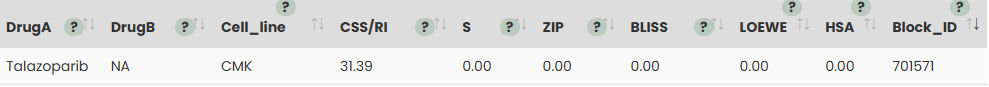

**Analisis**
1) Numero de cell lines
2) Numero de combinaciones
3) numero de farmacos distintos 

numero de drugs

In [11]:
distinct_drugs_count = df_drugs['dname'].nunique()
distinct_chembl_id_count = df_drugs['chembl_id'].nunique()
print('number of drugs names: ',distinct_drugs_count)
print('number of chembl ids: ', distinct_chembl_id_count)

number of drugs names:  8272
number of chembl ids:  7238


numero de cell lines

In [19]:
distinct_cell_lines_count = df_cell_lines['name'].nunique()
distinct_cellosaurus_count = df_cell_lines['cellosaurus_accession'].nunique()
distinct_diseases_count = df_cell_lines['disease_id'].nunique()
distinct_cui_count = df_cell_lines['UMLS_CUI'].nunique()
print('number of cell lines: ', distinct_cell_lines_count)
print('number of cellosaurus ids: ', distinct_cellosaurus_count)
print('number of diseases id (thseurus): ', distinct_diseases_count)
print('number of diseases cui (webscparring): ', distinct_cui_count)

number of cell lines:  2320
number of cellosaurus ids:  1659
number of diseases id (thseurus):  229
number of diseases cui (webscparring):  217


In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

# Define headers to simulate a real browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://cancer.sanger.ac.uk/cosmic/"
}


# Create a session
session = requests.Session()


# Function to get tumour location from COSMIC
def get_tumour_location(cosmic_id):
    url = f"https://cancer.sanger.ac.uk/cosmic/sample/overview?id={cosmic_id}"
    
    try:
        response = requests.get(url, headers=headers, timeout=5)  # Waits up to 5 seconds
        if response.status_code != 200:
            return "no acesss "  # If access is denied
    except requests.exceptions.RequestException as e:
        return f"Request error: {e}"
    
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract "Tumour location" using regex
    match = re.search(r"Tumour location\s*(.*?)\s*View this tissue/histology", soup.get_text(), re.DOTALL)
    
    return match.group(1).strip() if match else None


In [16]:
# Prepare the dataframe
df_valid = df_cell_lines.dropna(subset=["cosmic_id"]).copy()

# Ensure cosmic_id is an integer
df_valid["cosmic_id"] = df_valid["cosmic_id"].astype(int)


# Apply the function to fetch tumour locations
df_valid["tumour_location"] = df_valid["cosmic_id"].apply(get_tumour_location)

In [14]:
none_count = df_valid["tumour_location"].isna().sum()
none_count

np.int64(97)

In [18]:
import pandas as pd
df_valid=  pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\cell_Line_cui_name.csv") 

In [20]:
df_no_access = df_valid[df_valid["tumour_location"] == "no access"].copy()

In [22]:
df_no_access.shape[0]

707

In [19]:
import time
import random
# Filtrar las filas donde 'tumour_location' es 'no access'
df_no_access = df_valid[df_valid["tumour_location"] == "no access"].copy()

# Intentar nuevamente para estos casos
for index, row in df_no_access.iterrows():
    cosmic_id = row["cosmic_id"]
    new_location = get_tumour_location(cosmic_id)  # Volver a intentar
    
    # Actualizar solo si hay una respuesta válida
    if new_location and new_location != "no access":
        df_valid.at[index, "tumour_location"] = new_location
    
    # Esperar entre 5 y 10 segundos antes de la siguiente solicitud para evitar bloqueos
    wait_time = random.uniform(1,1.5)
    print(f"Esperando {wait_time:.2f} segundos antes de la próxima solicitud...")
    time.sleep(wait_time)

Esperando 1.48 segundos antes de la próxima solicitud...
Esperando 1.41 segundos antes de la próxima solicitud...
Esperando 1.42 segundos antes de la próxima solicitud...


KeyboardInterrupt: 

In [8]:
none_count = df_valid["tumour_location"].isna().sum()
none_count

np.int64(108)

In [17]:
df_valid.to_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\cell_Line_cui_name.csv", index=False)  # Guarda sin el índice

In [25]:
df_cell_lines

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data,UMLS_CUI
0,786-0,786-0; 786O; 786-0; 786.O; 786-O RCC; RCC 786-...,CVCL_1051,C9385,1,5.0,ACH-000649,SIDM00125,905947.0,786O_KIDNEY,BROAD_DepMap,NaN
1,A2058,A2058; A 2058; A-2058,CVCL_1059,C3802,2,10.0,ACH-000788,SIDM00797,906792.0,A2058_SKIN,BROAD_DepMap,C0206735
2,A2780,A2780; A-2780; 2780; A2780S,CVCL_0134,C7979,3,8.0,ACH-000657,SIDM00210,906804.0,A2780_OVARY,BROAD_DepMap,C0346163
3,A375,A375; A 375; A375; A375-MEL; A375-mel; A375mel,CVCL_0132,C3802,4,10.0,ACH-000219,SIDM00795,906793.0,A375_SKIN,BROAD_DepMap,C0206735
4,A427,A427; A427,CVCL_1055,C3512,5,7.0,ACH-000757,SIDM00810,910851.0,A427_LUNG,BROAD_DepMap,C0152013
...,...,...,...,...,...,...,...,...,...,...,...,...
2315,Dd2 K13 wild-type,Dd2 K13 wild-type,NaN,C34797,2316,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2316,163-KH2-024,163-KH2-024,NaN,C34797,2317,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2317,163-KH2-D33,163-KH2-D33,NaN,C34797,2318,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2318,967 539T,967 539T,NaN,C34797,2319,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import time
from random import uniform

# Define headers with a list of User-Agents
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
]

# Create a session for persistent connections
session = requests.Session()

# Function to get tumour location from COSMIC
def get_tumour_location(cosmic_id):
    if pd.isna(cosmic_id):  # Handle missing values
        return "No COSMIC ID"

    url = f"https://cancer.sanger.ac.uk/cosmic/sample/overview?id={int(cosmic_id)}"
    
    headers = {
        "User-Agent": USER_AGENTS[int(cosmic_id) % len(USER_AGENTS)],  # Rotate User-Agents
        "Accept-Language": "en-US,en;q=0.9",
        "Referer": "https://cancer.sanger.ac.uk/cosmic/"
    }

    for _ in range(3):  # Retry up to 3 times if request fails
        try:
            response = session.get(url, headers=headers, timeout=5)
            if response.status_code == 200:
                soup = BeautifulSoup(response.text, "html.parser")
                match = re.search(r"Tumour location\s*(.*?)\s*View this tissue/histology", soup.get_text(), re.DOTALL)
                return match.group(1).strip() if match else "Not Found"
            elif response.status_code == 403:
                return "Blocked (403)"
        except requests.exceptions.RequestException:
            time.sleep(uniform(2, 5))  # Wait before retrying

    return "Failed after retries"

# Function to process dataset in batches
def process_dataset(df, batch_size=50, delay=5):
    df["Tumour_Location"] = None  # Initialize column
    
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i + batch_size].copy()
        
        for index, row in batch.iterrows():
            tumour_location = get_tumour_location(row["cosmic_id"])
            df.at[index, "Tumour_Location"] = tumour_location
            time.sleep(uniform(1, 3))  # Random delay between requests

        print(f"Processed {i + len(batch)} / {len(df)}... Sleeping {delay} seconds")
        time.sleep(delay)  # Pause after each batch

    return df


# Process the dataset
df_valid = process_dataset(df_cell_lines)

Processed 50 / 2320... Sleeping 5 seconds
Processed 100 / 2320... Sleeping 5 seconds
Processed 150 / 2320... Sleeping 5 seconds
Processed 200 / 2320... Sleeping 5 seconds
Processed 250 / 2320... Sleeping 5 seconds
Processed 300 / 2320... Sleeping 5 seconds
Processed 350 / 2320... Sleeping 5 seconds
Processed 400 / 2320... Sleeping 5 seconds
Processed 450 / 2320... Sleeping 5 seconds
Processed 500 / 2320... Sleeping 5 seconds
Processed 550 / 2320... Sleeping 5 seconds
Processed 600 / 2320... Sleeping 5 seconds
Processed 650 / 2320... Sleeping 5 seconds
Processed 700 / 2320... Sleeping 5 seconds
Processed 750 / 2320... Sleeping 5 seconds
Processed 800 / 2320... Sleeping 5 seconds
Processed 850 / 2320... Sleeping 5 seconds
Processed 900 / 2320... Sleeping 5 seconds
Processed 950 / 2320... Sleeping 5 seconds
Processed 1000 / 2320... Sleeping 5 seconds
Processed 1050 / 2320... Sleeping 5 seconds
Processed 1100 / 2320... Sleeping 5 seconds
Processed 1150 / 2320... Sleeping 5 seconds
Processe

In [29]:
none_count = df_valid["Tumour_Location"].isna().sum()
none_count

np.int64(0)

In [30]:
(df_valid['Tumour_Location'] == 'Blocked (403)').sum()

np.int64(0)

In [39]:
none_count = df_cell_lines["cosmic_id"].isna().sum()
print(none_count)
print((df_valid['Tumour_Location'] == 'No COSMIC ID').sum())
none_count = df_valid["cellosaurus_accession"].isna().sum()
print(none_count)
print(df_cell_lines.shape[0],df_valid.shape[0])

1318
1318
661
2320 2320


In [33]:
df_valid

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data,UMLS_CUI,Tumour_Location
0,786-0,786-0; 786O; 786-0; 786.O; 786-O RCC; RCC 786-...,CVCL_1051,C9385,1,5.0,ACH-000649,SIDM00125,905947.0,786O_KIDNEY,BROAD_DepMap,NaN,Kidney (Carcinoma; Clear cell renal cell carci...
1,A2058,A2058; A 2058; A-2058,CVCL_1059,C3802,2,10.0,ACH-000788,SIDM00797,906792.0,A2058_SKIN,BROAD_DepMap,C0206735,Skin (Malignant melanoma)
2,A2780,A2780; A-2780; 2780; A2780S,CVCL_0134,C7979,3,8.0,ACH-000657,SIDM00210,906804.0,A2780_OVARY,BROAD_DepMap,C0346163,Ovary (Carcinoma; Adenocarcinoma)
3,A375,A375; A 375; A375; A375-MEL; A375-mel; A375mel,CVCL_0132,C3802,4,10.0,ACH-000219,SIDM00795,906793.0,A375_SKIN,BROAD_DepMap,C0206735,Skin (Malignant melanoma)
4,A427,A427; A427,CVCL_1055,C3512,5,7.0,ACH-000757,SIDM00810,910851.0,A427_LUNG,BROAD_DepMap,C0152013,Lung (Carcinoma)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,Dd2 K13 wild-type,Dd2 K13 wild-type,NaN,C34797,2316,3.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID
2316,163-KH2-024,163-KH2-024,NaN,C34797,2317,3.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID
2317,163-KH2-D33,163-KH2-D33,NaN,C34797,2318,3.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID
2318,967 539T,967 539T,NaN,C34797,2319,3.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID


In [40]:
df_valid.to_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\cell_Line_cui_cosmic_id_name.csv", index=False)  # Guarda sin el índice

**ahora le metemos la enfermedad de theasaurus**

In [2]:
import pandas as pd
df_cell_lines_cui_cosmic = pd.read_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\cell_Line_cui_cosmic_id_name.csv")

In [3]:
df_cell_lines_cui_cosmic

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data,UMLS_CUI,Tumour_Location
0,786-0,786-0; 786O; 786-0; 786.O; 786-O RCC; RCC 786-...,CVCL_1051,C9385,1,5.0,ACH-000649,SIDM00125,905947.0,786O_KIDNEY,BROAD_DepMap,NaN,Kidney (Carcinoma; Clear cell renal cell carci...
1,A2058,A2058; A 2058; A-2058,CVCL_1059,C3802,2,10.0,ACH-000788,SIDM00797,906792.0,A2058_SKIN,BROAD_DepMap,C0206735,Skin (Malignant melanoma)
2,A2780,A2780; A-2780; 2780; A2780S,CVCL_0134,C7979,3,8.0,ACH-000657,SIDM00210,906804.0,A2780_OVARY,BROAD_DepMap,C0346163,Ovary (Carcinoma; Adenocarcinoma)
3,A375,A375; A 375; A375; A375-MEL; A375-mel; A375mel,CVCL_0132,C3802,4,10.0,ACH-000219,SIDM00795,906793.0,A375_SKIN,BROAD_DepMap,C0206735,Skin (Malignant melanoma)
4,A427,A427; A427,CVCL_1055,C3512,5,7.0,ACH-000757,SIDM00810,910851.0,A427_LUNG,BROAD_DepMap,C0152013,Lung (Carcinoma)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,Dd2 K13 wild-type,Dd2 K13 wild-type,NaN,C34797,2316,3.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID
2316,163-KH2-024,163-KH2-024,NaN,C34797,2317,3.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID
2317,163-KH2-D33,163-KH2-D33,NaN,C34797,2318,3.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID
2318,967 539T,967 539T,NaN,C34797,2319,3.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID


In [4]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd

def get_cellosaurus_disease(accession):
    """Scrape the disease field from Cellosaurus for a given cellosaurus accession."""
    if pd.isna(accession):
        return None  # Skip if accession is missing
    
    url = f"https://www.cellosaurus.org/{accession}"
    
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.google.com/",
    "DNT": "1",  # Do Not Track request
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1"
    }
    
    for attempt in range(5):  # Retry mechanism
        try:
            response = requests.get(url, headers=headers, timeout=10)
            if response.status_code == 403:
                print(f"Access forbidden (403) for {accession}. Retrying...")
                time.sleep(2 ** attempt + random.uniform(0, 1))  # Exponential backoff
                continue
            elif response.status_code != 200:
                print(f"Failed to fetch {accession}, status code: {response.status_code}")
                return None
            
            soup = BeautifulSoup(response.text, 'html.parser')
            disease_label = soup.find(string="Disease")
            if disease_label:
                disease_info = disease_label.find_next("td").text.strip()
                return disease_info.split("(")[0].strip()  # Extract only the disease name
            
            return None  # Return None if no disease field is found
        except requests.RequestException as e:
            print(f"Request error for {accession}: {e}")
            time.sleep(2 ** attempt + random.uniform(0, 1))
    
    return None  # Return None if all retries fail



In [5]:
# Example of applying this function to your DataFrame
df_cell_lines_cui_cosmic["cellosaurus_tumor_location"] = df_cell_lines_cui_cosmic["cellosaurus_accession"].apply(get_cellosaurus_disease)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22728\2689084922.py:36: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  disease_label = soup.find(text="Disease")


In [7]:
none_count_cellosaurus = df_cell_lines_cui_cosmic["cellosaurus_accession"].isna().sum()
none_count_cellosaurus_cell_line = df_cell_lines_cui_cosmic["cellosaurus_tumor_location"].isna().sum()
print("The none count fro cellsaurus accesion: ", none_count_cellosaurus, "the none count for the cell line in cellosaurus: ",none_count_cellosaurus_cell_line)

The none count fro cellsaurus accesion:  661 the none count for the cell line in cellosaurus:  741


80 with cellosaurus accesion returned none. Lo he chequeado is es porque en la pagina web no esta el campo de disease. 

In [8]:
df_cell_lines_cui_cosmic.to_csv(r"C:\Users\Usuario\Desktop\TFM\datos\drugcomb_v2\cell_Line_cui_cosmic_id_name_v2.csv", index=False)  # Guarda sin el índice

chat me dice que las siguientes son del sistema nervioso:
* Astrocytoma
* Glioblastoma
* Primitive neuroectodermal tumor
* Meningioma
* Neuroblastoma
* Adrenal gland neuroblastoma
* Medulloblastoma, non-WNT/non-SHH, group 3
* Medulloblastoma, SHH-activated, TP53-mutant
* Anaplastic astrocytoma
* Intracranial meningioma
* Cervical small cell neuroendocrine carcinoma
* Medulloblastoma, SHH-activated, TP53-wildtype

In [16]:
related_diseases= ['Astrocytoma', 'Glioblastoma', 'Primitive neuroectodermal tumor',
       'Meningioma', 'Neuroblastoma', 'Adrenal gland neuroblastoma',
       'Medulloblastoma, non-WNT/non-SHH, group 3',
       'Medulloblastoma, SHH-activated, TP53-mutant',
       'Anaplastic astrocytoma', 'Intracranial meningioma',
       'Cervical small cell neuroendocrine carcinoma',
       'Medulloblastoma, SHH-activated, TP53-wildtype', 'Down syndrome']

In [17]:
df_central =  df_cell_lines_cui_cosmic[df_cell_lines_cui_cosmic['cellosaurus_tumor_location'].isin(related_diseases)]


In [29]:
df_central

,name,synonyms,cellosaurus_accession,disease_id,id,tissue_id,depmap_id,cell_model_passport_id,cosmic_id,ccle_name,expression_data,UMLS_CUI,Tumour_Location,cellosaurus_tumor_location
65,SF-268,SF-268; SF-268; SF 268,CVCL_1689,C60781,66,1.0,ACH-000655,SIDM00085,905986.0,SF268_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap,C0004114,Central nervous system; Brain (Glioma),Astrocytoma
66,SF-295,SF-295; SF-295; SF 295,CVCL_1690,C3058,67,1.0,ACH-000376,SIDM00084,905985.0,SF295_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap,C0017636,Central nervous system; Brain (Glioma),Glioblastoma
75,SNB-19,SNB-19; SNB.19; SNB19,CVCL_0535,C60781,76,1.0,ACH-001198,SIDM00109,NaN,SNB19_CENTRAL_NERVOUS_SYSTEM,NaN,C0004114,No COSMIC ID,Astrocytoma
76,SNB-75,SNB-75; SNB.75; SNB75,CVCL_1706,C3058,77,1.0,ACH-000504,SIDM00095,905982.0,SNB75_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap,C0017636,Central nervous system; Brain (Glioma),Glioblastoma
82,U251,U251; U-251 MG; U-251-MG; U-251_MG; U251-MG; U...,CVCL_0021,C60781,83,1.0,ACH-000232,SIDM00111,905983.0,U251MG_CENTRAL_NERVOUS_SYSTEM,BROAD_DepMap,C0004114,Central nervous system; Brain (Glioma),Astrocytoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,U3005MG,U3005MG; U3005-MG; U3005,CVCL_IR58,C3058,2270,1.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID,Glioblastoma
2270,U3013MG,U3013MG; U3013-MG; U3013,CVCL_IR61,C3058,2271,1.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID,Glioblastoma
2271,U3024MG,U3024MG; U3024-MG; U3024,CVCL_IR67,C3058,2272,1.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID,Glioblastoma
2272,U3034MG,U3034MG; U3034-MG; U3034,CVCL_IR73,C3058,2273,1.0,NaN,NaN,NaN,NaN,NaN,NaN,No COSMIC ID,Glioblastoma


In [26]:
id_list_nervous = df_central['id'].tolist()

numero de combinaciones

In [21]:
distinct_combinations_count = df_summary['block_id'].nunique()
distinct_combinations_count

740001

In [52]:
# Contar valores únicos en 'block_id' excluyendo valores 0 y NaN
distinct_drug_count = df_summary.loc[(df_summary['drug_col_id'] != 0) & (~df_summary['drug_col_id'].isna()), 'block_id'].nunique()
print("numero de veces que solo hay información de una drug: ", distinct_combinations_count-distinct_drug_count)

numero de veces que solo hay información de una drug:  273742


In [48]:
# Crear una variable intermedia combinando 'drug_row_id' y 'drug_col_id' en un formato ordenado
df_summary['drug_pair'] = df_summary.apply(lambda row: tuple(sorted([row['drug_row_id'], row['drug_col_id']])), axis=1)
duplicates_df = df_summary[df_summary.duplicated(subset=['drug_pair'], keep=False)]

# Eliminar duplicados basados en la combinación única de 'drug_row_id' y 'drug_col_id'
filtered_df = df_summary.drop_duplicates(subset=['drug_pair'],keep='first' )
distinct_drug_count_v2 = filtered_df.loc[(filtered_df['drug_col_id'] != 0) & (~filtered_df['drug_col_id'].isna()), 'block_id'].nunique()


In [49]:
duplicates_df 

,block_id,drug_row_id,drug_col_id,cell_line_id,conc_r_unit,conc_c_unit,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,...,ri_row,ri_col,css_row,css_col,css_ri,S_sum,quality,S_mean,S_max,drug_pair
1,1,1,2,2,uM,uM,3.865915,-2.951386,5.536903,6.256584,...,11.471,-0.441,22.545,39.193,30.869,19.839,NaN,25.3540,19.398,"(1, 2)"
2,2,1,2,2,uM,uM,8.247403,3.125927,11.614215,12.333896,...,11.471,-0.441,24.135,30.785,27.460,16.430,NaN,21.9450,15.989,"(1, 2)"
3,3,1,2,2,uM,uM,6.063440,2.452239,10.940528,11.660209,...,11.471,-0.441,25.561,34.241,29.901,18.871,NaN,24.3860,18.430,"(1, 2)"
4,4,1,2,2,uM,uM,-4.280231,-4.062761,4.425528,5.145209,...,11.471,-0.441,16.661,31.371,24.016,12.986,NaN,18.5010,12.545,"(1, 2)"
5,5,1,3,2,uM,uM,12.284698,10.409407,18.656340,15.765467,...,11.471,25.164,76.501,57.193,66.847,30.212,NaN,48.5295,41.683,"(1, 3)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740143,739996,1421,0,7,uM,NaN,0.000000,0.000000,0.000000,0.000000,...,10.944,0.000,0.000,0.000,10.944,0.000,NaN,5.4720,0.000,"(0, 1421)"
740144,739997,4527,0,7,uM,NaN,0.000000,0.000000,0.000000,0.000000,...,0.429,0.000,0.000,0.000,0.429,0.000,NaN,0.2145,0.000,"(0, 4527)"
740145,739998,1213,0,7,uM,NaN,0.000000,0.000000,0.000000,0.000000,...,9.648,0.000,0.000,0.000,9.648,0.000,NaN,4.8240,0.000,"(0, 1213)"
740146,739999,1287,0,7,uM,NaN,0.000000,0.000000,0.000000,0.000000,...,-14.193,0.000,0.000,0.000,-14.193,0.000,NaN,-7.0965,-14.193,"(0, 1287)"


In [53]:
distinct_drug_count_v2

62956

numero de combinaciones con enfermedades del sistema nervioso central (secado del cellosaurus id )

In [27]:
filtered_summary = df_summary[df_summary['cell_line_id'].isin(id_list_nervous)]

In [30]:
# Contar valores únicos en 'block_id' excluyendo valores 0 y NaN
distinct_drug_count = filtered_summary.loc[(filtered_summary['drug_col_id'] != 0) & (~filtered_summary['drug_col_id'].isna()), 'block_id'].nunique()
print("numero de veces que solo hay información de una drug: ", distinct_combinations_count-distinct_drug_count)

numero de veces que solo hay información de una drug:  709421


In [32]:
# Crear una variable intermedia combinando 'drug_row_id' y 'drug_col_id' en un formato ordenado
filtered_summary['drug_pair'] = filtered_summary.apply(lambda row: tuple(sorted([row['drug_row_id'], row['drug_col_id']])), axis=1)
duplicates_df = filtered_summary[filtered_summary.duplicated(subset=['drug_pair'], keep=False)]

# Eliminar duplicados basados en la combinación única de 'drug_row_id' y 'drug_col_id'
filtered_df = filtered_summary.drop_duplicates(subset=['drug_pair'],keep='first' )
distinct_drug_count_v3 = filtered_df.loc[(filtered_df['drug_col_id'] != 0) & (~filtered_df['drug_col_id'].isna()), 'block_id'].nunique()
print('Numero de drug pairs, que no son duplicadas, ni una de las 2 es 0 ni esta vacia: ', distinct_drug_count_v3)

Numero de drug pairs, que no son duplicadas, ni una de las 2 es 0 ni esta vacia:  8975


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22728\2349067479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_summary['drug_pair'] = filtered_summary.apply(lambda row: tuple(sorted([row['drug_row_id'], row['drug_col_id']])), axis=1)


### Resumen: 

1) Hemos hecho webscrapping matcheando disease_id (thesaurus) - cui  https://ncit.nci.nih.gov/ncitbrowser/ConceptReport.jsp?dictionary=NCI_Thesaurus&ns=ncit&code=C60781
2) Hemos visto que de este match sacamos 4 (lineas celulres + disease_id) usadas para el disease sindrome de down. Las lineas celulares son de leucemia. si lo miras en https://www.cellosaurus.org/CVCL_0216 o con el cosmic id 
3) Sacamos combinación de fármacos que se ven relacionados con esta (lineas celulres + disease_id) --> pero por alguna razon no es de combinacion de farmacos solo es uno
4) Webscrapping lineas celulares cosmic id + cellosaurus
5) Hemos sacado unas 9000 aprox instancias relacionadas a enfermedades del sistema nervioso central 




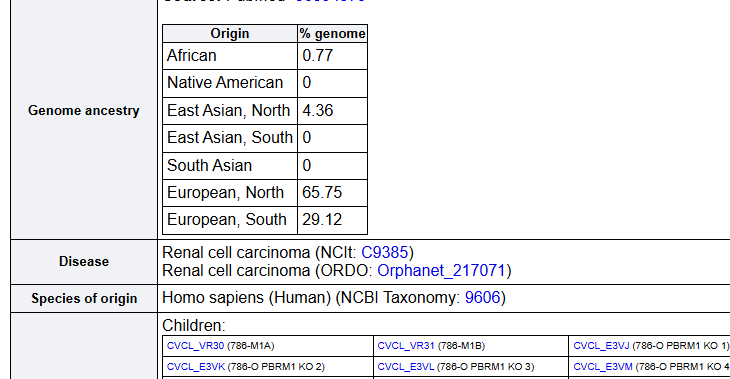